<a href="https://colab.research.google.com/github/Adevrari/Decision-tree-Random-Forest/blob/main/DecisionTree%26RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>

<hr>

<hr>

# **Problem Statement**

**Telecom Churn Analysis Telecom Churn (loss of customers to competition) is a problem for telecom companies because it is expensive to acquire a new customer and companies want to retain their existing customers. Most telecom companies suffer from voluntary churn.**


**Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.**

**Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can priorities focused marketing efforts on that subset of their customer base.**

**Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.**

**Using the machine learning analysis, try to find out how many consumer have already churned out from the company**

<hr>

# **Step 1 - Import the libraries**

**1. Configuration libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**2. Mandatory ones**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

**3. Machine Learning Libraries and evaluations**

In [ ]:
from sklearn.metrics import *
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

<hr>

# **Step 2 - Data Loading**

In [ ]:
df = pd.read_csv("/content/customer_churn.csv")

**Data Inspection**

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'#008080',
        "color": 'white',
        "border-color":'white',
        'border-style': 'solid'
    }
)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


**Insights**
  * **The data needs to be encoded**
  * **Customer ID columns needs to be dropped**

In [ ]:
df = df.drop('customerID', axis = 1)

**Shape Inspection**

In [ ]:
a = df.shape
print(f'The rows: {a[0]} and columns: {a[1]}')

The rows: 7043 and columns: 20


**Columns Inspection**


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Information about the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Insight**
  * **No null values**
  * **Churn is the target**
  * **We need to do label Encoding**
  * **TotalCharges columns should be numeric**

**Change into the datatypes**

In [ ]:
# converting the SeniorCitizen into object
dtypes = {'SeniorCitizen': object,}

df = df.astype(dtypes)

In [ ]:
# converting the TotalCharges into float
df.replace(' ', np.nan, inplace=True)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Statistical Summary**

In [ ]:
df.describe().T.style.set_properties(
    **{
        'background-color':'#008080',
        "color": 'white',
        "border-color":'white',
        'border-style': 'solid'
    }
)

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7032.000000,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000


<hr>

# **Step 3 - Data Cleaning**

**Empty or null values check**

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dropping

In [ ]:
df = df.dropna()

**Check for Duplicates**

In [ ]:
df.duplicated().sum()

22

In [ ]:
df = df.drop_duplicates()

**Shape inspection after operation**

In [ ]:
a = df.shape
print(f'The rows are: {a[0]} and columns are {a[1]}')

The rows are: 7010 and columns are 20


**Outliers Analysis and Elimation (if required)**

In [ ]:
col_list = df.columns

# grabbing all the columns relevant
for x in col_list:
  if df[x].dtype != 'object':
    fig = px.box(df[x], title = f'The box plot for {x}')
    fig.update_layout(width = 500, height = 500)
    fig.show()

<hr>

# **Step 4 - Feature Selection**

In [ ]:
cat_cols = []

for x in df.columns:
  if df[x].dtype == 'object':
    cat_cols.append(x)

In [ ]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for x in cat_cols:
  df[x] = le.fit_transform(df[x])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Feature Selection**
* Correlation
* RFE (Recursive Feature Elimination)

<Axes: >

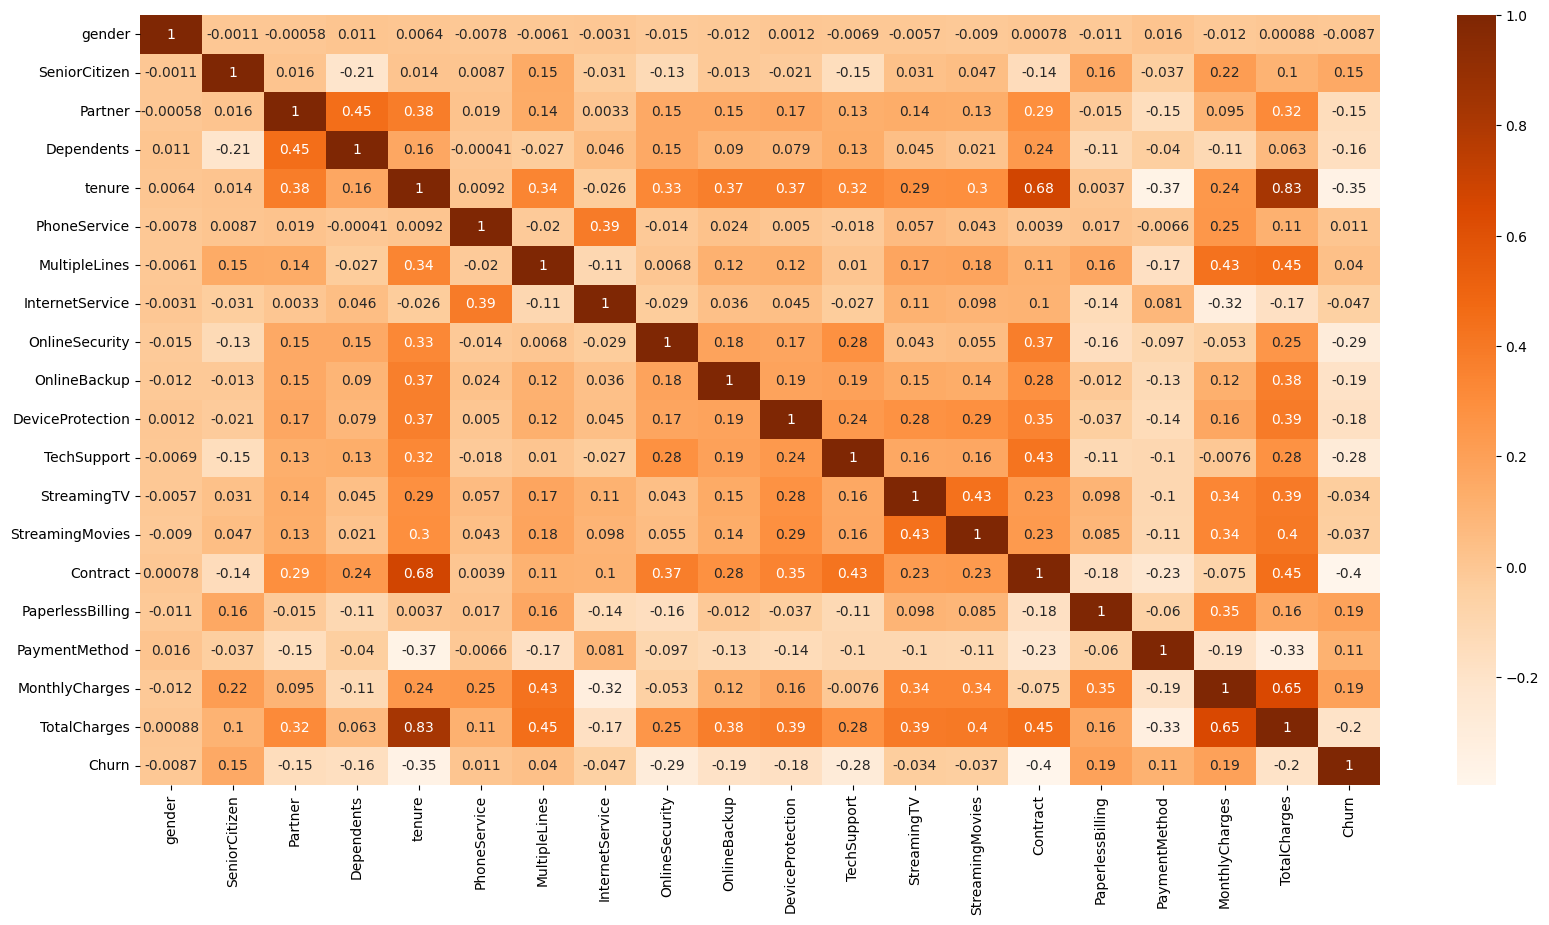

In [ ]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True, cmap = 'Oranges')

**Splitting the data**

In [ ]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

**Train_test_split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

**Model Formulation**

In [ ]:
model1 = DecisionTreeClassifier()

model2 = RandomForestClassifier()

**RFE on Decision Tree**

In [ ]:
rfe1 = RFE(model1, n_features_to_select = 8)

rfe1 = rfe1.fit(x_train, y_train)

**Getting the output**

In [ ]:
rfe_table1 = pd.DataFrame(list(zip(x_train.columns, rfe1.support_, rfe1.ranking_)), columns = ['Features', 'Support', 'Rank'])

In [ ]:
rfe_table1.sort_values(by = 'Rank', ascending = True)

,Features,Support,Rank
0,gender,True,1
16,PaymentMethod,True,1
14,Contract,True,1
17,MonthlyCharges,True,1
8,OnlineSecurity,True,1
18,TotalCharges,True,1
4,tenure,True,1
3,Dependents,True,1
1,SeniorCitizen,False,2
15,PaperlessBilling,False,3


In [ ]:
selected_col = x_train.columns[rfe1.support_]
selected_col

Index(['gender', 'Dependents', 'tenure', 'OnlineSecurity', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

**Implementing the same on the data**

In [ ]:
x_train_dt = x_train[selected_col]
x_test_dt = x_test[selected_col]

<hr>

**Random Forest with RFE**

In [ ]:
rfe2 = RFE(model2, n_features_to_select = 8)

rfe2 = rfe2.fit(x_train, y_train)

**Getting the output**

In [ ]:
rfe_table2 = pd.DataFrame(list(zip(x_train.columns, rfe2.support_, rfe2.ranking_)), columns = ['Features', 'Support', 'Rank'])

In [ ]:
rfe_table2.sort_values(by = 'Rank', ascending = True)

,Features,Support,Rank
0,gender,True,1
16,PaymentMethod,True,1
14,Contract,True,1
11,TechSupport,True,1
17,MonthlyCharges,True,1
8,OnlineSecurity,True,1
18,TotalCharges,True,1
4,tenure,True,1
15,PaperlessBilling,False,2
7,InternetService,False,3


In [ ]:
selected_col = x_train.columns[rfe2.support_]
selected_col

Index(['gender', 'tenure', 'OnlineSecurity', 'TechSupport', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

**Implementing the same on the data**

In [ ]:
x_train_rf = x_train[selected_col]
x_test_rf = x_test[selected_col]

<hr>

# **Step 5 - Model Formulation**

**Firstly Decision Tree**

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train_dt, y_train)

DecisionTreeClassifier()

In [ ]:
pred = model.predict(x_test_dt)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test, pred))

Accuracy Score:  0.7261836851112379


**Secondly, Random Forest**

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train_rf, y_train)

RandomForestClassifier()

In [ ]:
pred = model.predict(x_test_rf)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test, pred))

Accuracy Score:  0.7917855105533371


<hr>

# **Decision Tree parameters:**

1. **criterion**: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

2. **splitter**: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

3. **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

4. **min_samples_split**: The minimum number of samples required to split an internal node.

5. **min_samples_leaf**: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

6. **min_weight_fraction_leaf**: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

7. **max_features**: The number of features to consider when looking for the best split.

8. **max_leaf_nodes**: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

9. **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

10. **min_impurity_split**: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

<hr>

# **Step 6 - Hyper-parameter Optimization**

**Ways to Implement Hyperparameter Optimization**
  * **GridSearch-CrossValidation**
  * **RandomizedSearch-CrossValidation**

<hr>

# **HyperParameter tuning on DecisionTree**

In [ ]:
DT_Params = {
    "criterion":['gini', 'entropy'],
    'max_depth':[2, 4, 6, 8],
    'min_samples_split':[2, 5, 10]
}

model = DecisionTreeClassifier()

Implementation

In [ ]:
# implementation of the GridSearch
DT_HP = GridSearchCV(model, DT_Params, cv = 5, verbose = 3)

# Fit the GridSearchCV on to my data
DT_HP.fit(x_train_dt, y_train)

# Getting the model best paramters
DT_Model_HP = DT_HP.best_estimator_

# printing the combination
print("Best paramter for DecisionTree are: ", DT_HP.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.719 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.719 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.745 total t

Evaluation

In [ ]:
pred = DT_Model_HP.predict(x_test_dt)

In [ ]:
print('Accuracy_score: ', accuracy_score(y_test, pred))

Accuracy_score:  0.7917855105533371


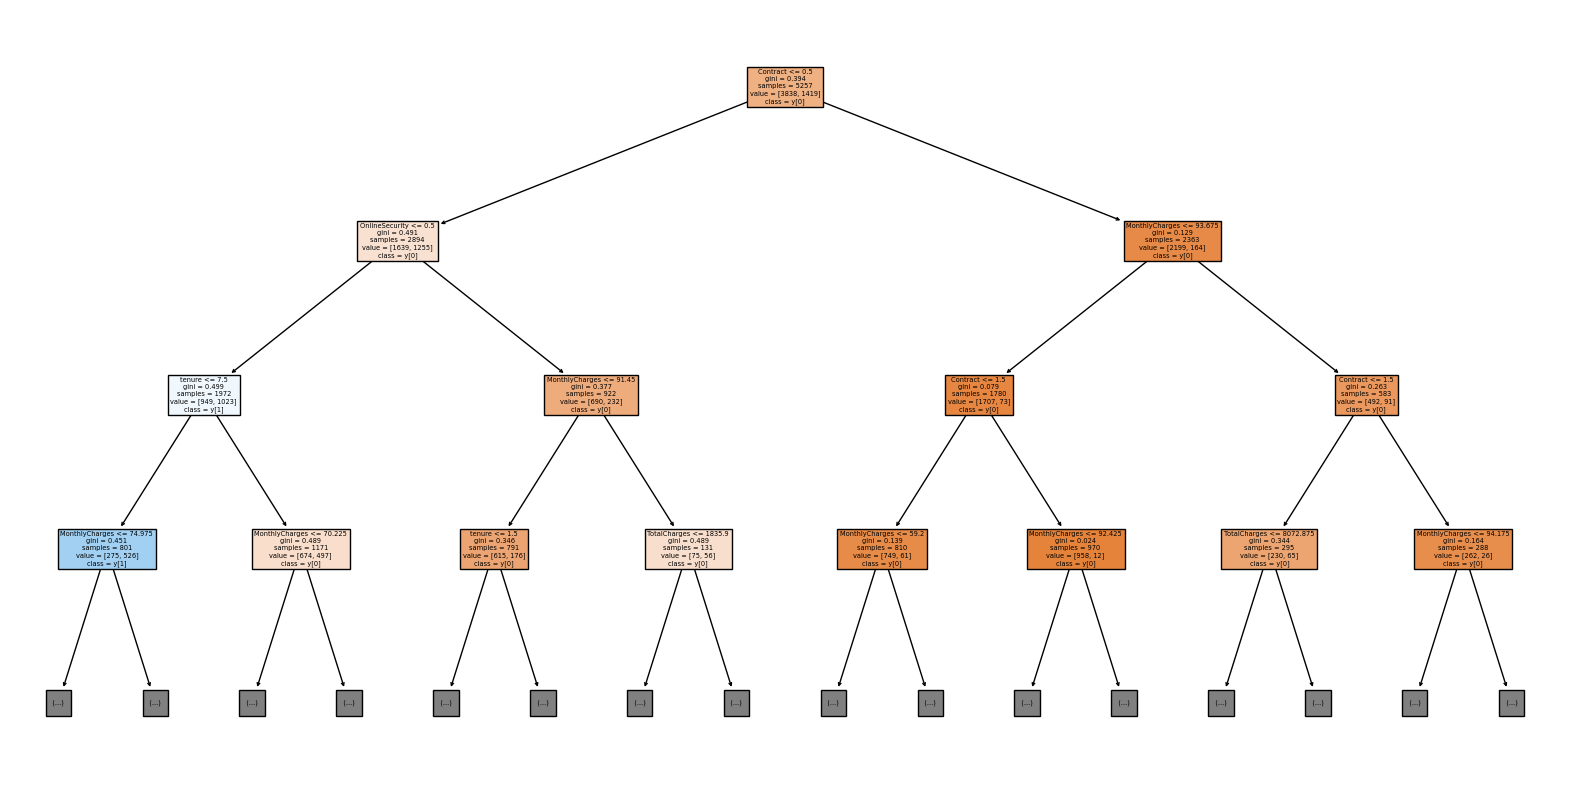

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(DT_Model_HP, feature_names=x_train_dt.columns, filled=True, max_depth = 3, class_names = True)
plt.show()

<hr>

# **HyperParameter tuning on Random Forest**

In [ ]:
RF_Params = {
    "criterion":['gini', 'entropy'],
    'n_estimators' : [10, 50, 100, 200],
    'max_depth':[3, 5, 7],
    'min_samples_split':[3, 7, 10]
}

model = RandomForestClassifier()

In [ ]:
# implementation of the GridSearch
RF_HP = GridSearchCV(model, RF_Params, cv = 5, verbose = 3) # verbose = 3

# Fit the GridSearchCV on to my data
RF_HP.fit(x_train_rf, y_train)

# Getting the model best paramters
RF_Model_HP = RF_HP.best_estimator_

# printing the combination
print("Best paramter for RandomForest are: ", RF_HP.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.789 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.787 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.792 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=50;, score=0.795 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=50;, score=0.796 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=50;, score=0.788 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, 

Evaluation

In [ ]:
pred = RF_Model_HP.predict(x_test_rf)

In [ ]:
print('Accuracy_score: ', accuracy_score(y_test, pred))

Accuracy_score:  0.8100399315459212


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(x_train_rf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = model.predict(x_test_rf)

In [ ]:
print('Accuracy_score: ', accuracy_score(y_test, pred))

Accuracy_score:  0.7872219053051911
